In [1]:
import numpy as np
import geopandas as gpd
from simplification.cutil import simplify_coords, simplify_coords_vw
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
gdf = gpd.read_file(r"T:\2Mattijn\profiel\Export_Output_66.shp")

# only select heights above -9 meter
gdf = gdf[gdf['RASTERAHN']>-9]

# compute distance between points and place back in gdf
org_dist_q = np.sqrt(gdf['Xp']**2+gdf['Yp']**2)
delta_dist = org_dist_q - org_dist_q[0]
gdf.loc[:,'delta_dist'] = delta_dist

In [3]:
# get delta distance and the height values as array
dz_coords = gdf[['delta_dist','RASTERAHN']].values
dz_coords = dz_coords.copy(order='C')

In [4]:
# apply Ramer–Douglas–Peucker simplifiction algorithm
simp_dz_coords = simplify_coords(dz_coords, 0.2)

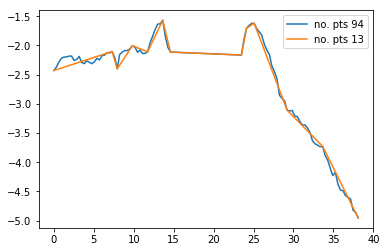

In [5]:
# visualise
plt.plot(dz_coords[:,0], dz_coords[:,1], label='no. pts {}'.format(len(dz_coords)))
plt.plot(simp_dz_coords[:,0], simp_dz_coords[:,1], label='no. pts {}'.format(len(simp_dz_coords)))
plt.legend()
plt.show()

In [6]:
# apply Visvalingam-Whyatt simplifiction algorithm
simp_dz_coords_vw = simplify_coords_vw(dz_coords, 0.2)

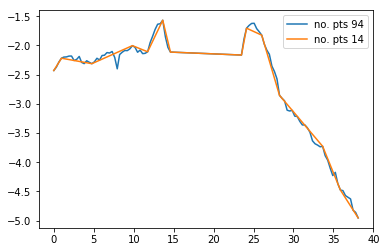

In [7]:
# visualise
plt.plot(dz_coords[:,0], dz_coords[:,1], label='no. pts {}'.format(len(dz_coords)))
plt.plot(simp_dz_coords_vw[:,0], simp_dz_coords_vw[:,1], label='no. pts {}'.format(len(simp_dz_coords_vw)))
plt.legend()
plt.show()